# Deep Learning with RNN, LSTM, and GRU on IMDb
This notebook loads the IMDb sentiment dataset, preprocesses the text, and trains three models:
- **Simple RNN**
- **LSTM**
- **GRU**

It then evaluates each model and plots their training/validation accuracy and loss for easy comparison.

> **Tip:** Training can take several minutes depending on your hardware. You may lower `epochs` or use a GPU for faster training.

## 1  Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense,BatchNormalization, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
from tensorflow.keras.callbacks import EarlyStopping

## 2  Load & Pre‑process IMDb Dataset

In [3]:
# Restrict to the top 10000 most frequent words
NUM_WORDS = 10000
MAXLEN = 200  # maximum review length (in words)

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=NUM_WORDS)

# Pad / truncate reviews so they are all the same length
X_train = pad_sequences(X_train, maxlen=MAXLEN)
X_test  = pad_sequences(X_test,  maxlen=MAXLEN)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Train shape: (25000, 200), Test shape: (25000, 200)


In [4]:
X_train[0]

array([   5,   25,  100,   43,  838,  112,   50,  670,    2,    9,   35,
        480,  284,    5,  150,    4,  172,  112,  167,    2,  336,  385,
         39,    4,  172, 4536, 1111,   17,  546,   38,   13,  447,    4,
        192,   50,   16,    6,  147, 2025,   19,   14,   22,    4, 1920,
       4613,  469,    4,   22,   71,   87,   12,   16,   43,  530,   38,
         76,   15,   13, 1247,    4,   22,   17,  515,   17,   12,   16,
        626,   18,    2,    5,   62,  386,   12,    8,  316,    8,  106,
          5,    4, 2223, 5244,   16,  480,   66, 3785,   33,    4,  130,
         12,   16,   38,  619,    5,   25,  124,   51,   36,  135,   48,
         25, 1415,   33,    6,   22,   12,  215,   28,   77,   52,    5,
         14,  407,   16,   82,    2,    8,    4,  107,  117, 5952,   15,
        256,    4,    2,    7, 3766,    5,  723,   36,   71,   43,  530,
        476,   26,  400,  317,   46,    7,    4,    2, 1029,   13,  104,
         88,    4,  381,   15,  297,   98,   32, 20

### Utility: Plot Training History

In [5]:
def plot_model_history(histories, labels):
    """Plot accuracy & loss curves for a list of Keras History objects."""
    plt.figure(figsize=(14, 5))

    # Accuracy subplot
    plt.subplot(1, 2, 1)
    for h, label in zip(histories, labels):
        plt.plot(h.history['accuracy'], label=f'{label} ‑ train')
        plt.plot(h.history['val_accuracy'], '--', label=f'{label} ‑ val')
    plt.title('Accuracy')
    plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend()

    # Loss subplot
    plt.subplot(1, 2, 2)
    for h, label in zip(histories, labels):
        plt.plot(h.history['loss'], label=f'{label} ‑ train')
        plt.plot(h.history['val_loss'], '--', label=f'{label} ‑ val')
    plt.title('Loss')
    plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend()

    plt.tight_layout()
    plt.show()

## 3  Simple RNN Model

In [40]:
# Embedding Layer

rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=NUM_WORDS, output_dim=200, input_length=MAXLEN))

# RNN Layer (You can replace it with LSTM/GRU)
rnn_model.add(SimpleRNN(32))
rnn_model.add(BatchNormalization())
rnn_model.add(Dropout(0.3))


# Dense Layer (Output layer)
rnn_model.add(Dense(128))
rnn_model.add(Dense(1, activation='sigmoid'))  # Binary classification (positive/negative sentiment)


rnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [41]:
early_stop = EarlyStopping(patience=10, restore_best_weights=True)
rnn_history = rnn_model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=2
)

Epoch 1/10
313/313 - 12s - 39ms/step - accuracy: 0.7619 - loss: 0.4810 - val_accuracy: 0.8208 - val_loss: 0.4077
Epoch 2/10
313/313 - 6s - 18ms/step - accuracy: 0.8750 - loss: 0.3099 - val_accuracy: 0.8444 - val_loss: 0.3769
Epoch 3/10
313/313 - 6s - 18ms/step - accuracy: 0.9169 - loss: 0.2161 - val_accuracy: 0.8376 - val_loss: 0.4612
Epoch 4/10
313/313 - 5s - 17ms/step - accuracy: 0.9452 - loss: 0.1506 - val_accuracy: 0.8110 - val_loss: 0.5517
Epoch 5/10
313/313 - 11s - 34ms/step - accuracy: 0.9642 - loss: 0.1013 - val_accuracy: 0.7470 - val_loss: 0.6513
Epoch 6/10
313/313 - 10s - 33ms/step - accuracy: 0.9743 - loss: 0.0696 - val_accuracy: 0.8328 - val_loss: 0.7808
Epoch 7/10
313/313 - 5s - 17ms/step - accuracy: 0.9847 - loss: 0.0459 - val_accuracy: 0.8222 - val_loss: 0.8594
Epoch 8/10
313/313 - 6s - 18ms/step - accuracy: 0.9858 - loss: 0.0439 - val_accuracy: 0.8220 - val_loss: 0.9318
Epoch 9/10
313/313 - 5s - 17ms/step - accuracy: 0.9787 - loss: 0.0598 - val_accuracy: 0.8118 - val_lo

In [42]:
rnn_loss, rnn_acc = rnn_model.evaluate(X_train, y_train, verbose=0)
print(f"RNN Train Accuracy ={rnn_acc:.4f}")
rnn_loss, rnn_acc = rnn_model.evaluate(X_test, y_test, verbose=0)
print(f"RNN Test Accuracy ={rnn_acc:.4f}")

RNN Train Accuracy =0.9200
RNN Test Accuracy =0.8388


## 4  LSTM Model

In [37]:
lstm_model = Sequential()

# Embedding Layer
lstm_model.add(Embedding(input_dim=NUM_WORDS, output_dim=200, input_length=MAXLEN))

# RNN Layer (You can replace it with LSTM/GRU)
lstm_model.add(SimpleRNN(32))
lstm_model.add(BatchNormalization())
lstm_model.add(Dropout(0.10))


# Dense Layer (Output layer)
lstm_model.add(Dense(128))
lstm_model.add(Dense(1, activation='sigmoid'))  # Binary classification (positive/negative sentiment)


lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [38]:
early_stop = EarlyStopping(patience=10, restore_best_weights=True)
lstm_history = lstm_model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=2
)

Epoch 1/10
313/313 - 13s - 41ms/step - accuracy: 0.7770 - loss: 0.4598 - val_accuracy: 0.8560 - val_loss: 0.3398
Epoch 2/10
313/313 - 6s - 20ms/step - accuracy: 0.8937 - loss: 0.2728 - val_accuracy: 0.8600 - val_loss: 0.3597
Epoch 3/10
313/313 - 5s - 17ms/step - accuracy: 0.9289 - loss: 0.1873 - val_accuracy: 0.8556 - val_loss: 0.4390
Epoch 4/10
313/313 - 10s - 33ms/step - accuracy: 0.9574 - loss: 0.1146 - val_accuracy: 0.8564 - val_loss: 0.5402
Epoch 5/10
313/313 - 6s - 18ms/step - accuracy: 0.9395 - loss: 0.1523 - val_accuracy: 0.6734 - val_loss: 0.7544
Epoch 6/10
313/313 - 10s - 33ms/step - accuracy: 0.9468 - loss: 0.1362 - val_accuracy: 0.8002 - val_loss: 0.6766
Epoch 7/10
313/313 - 10s - 32ms/step - accuracy: 0.9815 - loss: 0.0538 - val_accuracy: 0.7834 - val_loss: 0.9179
Epoch 8/10
313/313 - 6s - 18ms/step - accuracy: 0.9893 - loss: 0.0301 - val_accuracy: 0.7996 - val_loss: 0.9096
Epoch 9/10
313/313 - 5s - 17ms/step - accuracy: 0.9923 - loss: 0.0217 - val_accuracy: 0.8092 - val_l

In [39]:
lstm_loss, lstm_acc = lstm_model.evaluate(X_train, y_train, verbose=0)
print(f"LSTM Train Accuracy = {lstm_acc:.4f}")
lstm_loss, lstm_acc = lstm_model.evaluate(X_test, y_test, verbose=0)
print(f"LSTM Test Accuracy = {lstm_acc:.4f}")

LSTM Train Accuracy = 0.9009
LSTM Test Accuracy = 0.8538


## 5  GRU Model

In [31]:
gru_model = Sequential()


# Embedding Layer
gru_model.add(Embedding(input_dim=NUM_WORDS, output_dim=200, input_length=MAXLEN))

# RNN Layer (You can replace it with LSTM/GRU)
gru_model.add(SimpleRNN(32))
gru_model.add(BatchNormalization())
gru_model.add(Dropout(0.3))


# Dense Layer (Output layer)
gru_model.add(Dense(128))
gru_model.add(Dense(1, activation='sigmoid'))  # Binary classification (positive/negative sentiment)


gru_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [32]:
early_stop = EarlyStopping(patience=10, restore_best_weights=True)
gru_history = gru_model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=2
)

Epoch 1/10
313/313 - 13s - 41ms/step - accuracy: 0.7329 - loss: 0.5091 - val_accuracy: 0.8310 - val_loss: 0.3857
Epoch 2/10
313/313 - 5s - 17ms/step - accuracy: 0.8557 - loss: 0.3408 - val_accuracy: 0.7026 - val_loss: 0.6636
Epoch 3/10
313/313 - 5s - 17ms/step - accuracy: 0.9082 - loss: 0.2316 - val_accuracy: 0.7834 - val_loss: 0.5037
Epoch 4/10
313/313 - 10s - 33ms/step - accuracy: 0.9582 - loss: 0.1166 - val_accuracy: 0.8158 - val_loss: 0.5909
Epoch 5/10
313/313 - 10s - 33ms/step - accuracy: 0.9740 - loss: 0.0738 - val_accuracy: 0.8028 - val_loss: 0.8180
Epoch 6/10
313/313 - 6s - 18ms/step - accuracy: 0.9770 - loss: 0.0621 - val_accuracy: 0.8258 - val_loss: 0.7406
Epoch 7/10
313/313 - 5s - 18ms/step - accuracy: 0.9749 - loss: 0.0697 - val_accuracy: 0.7418 - val_loss: 0.9042
Epoch 8/10
313/313 - 5s - 17ms/step - accuracy: 0.9765 - loss: 0.0628 - val_accuracy: 0.8060 - val_loss: 0.9562
Epoch 9/10
313/313 - 10s - 33ms/step - accuracy: 0.9890 - loss: 0.0309 - val_accuracy: 0.8132 - val_l

In [33]:
gru_loss, gru_acc = gru_model.evaluate(X_train, y_train, verbose=0)
print(f"GRU Train Accuracy={gru_acc:.4f}")
gru_loss, gru_acc = gru_model.evaluate(X_test, y_test, verbose=0)
print(f"GRU Test Accuracy={gru_acc:.4f}")

GRU Train Accuracy=0.8766
GRU Test Accuracy=0.8347


## 6  Compare Models

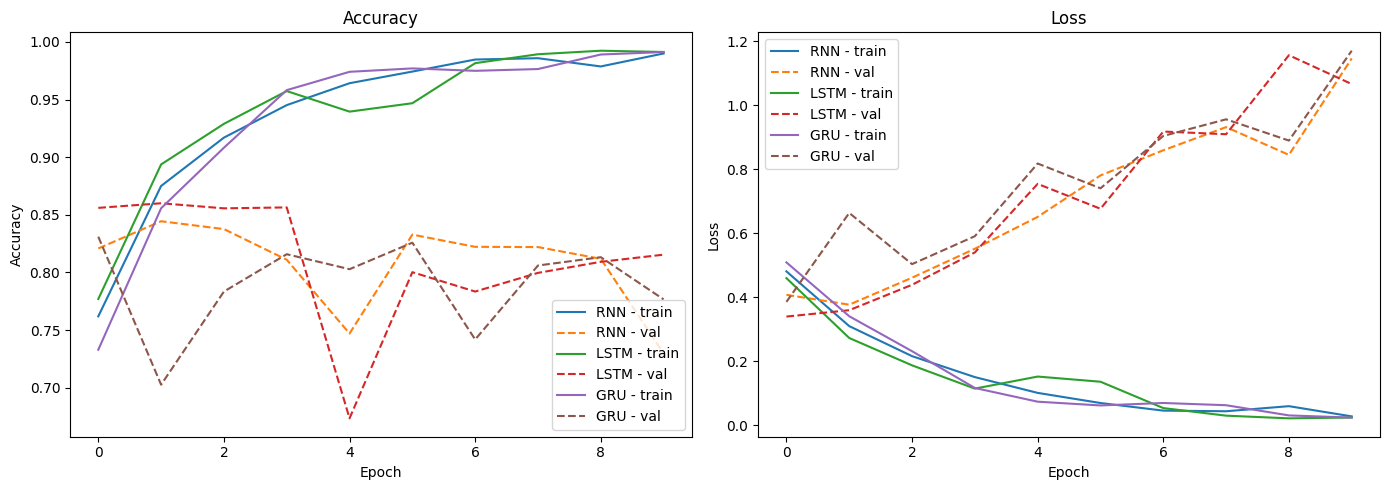

RNN  test accuracy: 0.8388
LSTM test accuracy: 0.8538
GRU  test accuracy: 0.8347


In [43]:
plot_model_history(
    [rnn_history, lstm_history, gru_history],
    ['RNN', 'LSTM', 'GRU']
)

print(f"RNN  test accuracy: {rnn_acc:.4f}")
print(f"LSTM test accuracy: {lstm_acc:.4f}")
print(f"GRU  test accuracy: {gru_acc:.4f}")

# 7 Predict single Review 3 Models

In [49]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Sample input
sample_review = "This movie was absolutely fantastic and full of surprises!"

# Convert in tokenizer
tokenizer = Tokenizer(num_words=sample_review)
sequence = tokenizer.texts_to_sequences([sample_review])

# Pad the sequence to match the input shape of the model
padded = pad_sequences(sequence, maxlen=200)

# Predict
rnn_pred = rnn_model.predict(padded)[0][0]
lstm_pred = lstm_model.predict(padded)[0][0]
gru_pred = gru_model.predict(padded)[0][0]

# Results
print("RNN Prediction:", "Positive" if rnn_pred > 0.5 else "Negative", f"({rnn_pred:.2f})")
print("LSTM Prediction:", "Positive" if lstm_pred > 0.5 else "Negative", f"({lstm_pred:.2f})")
print("GRU Prediction:", "Positive" if gru_pred > 0.5 else "Negative", f"({gru_pred:.2f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
RNN Prediction: Positive (0.98)
LSTM Prediction: Negative (0.48)
GRU Prediction: Positive (0.77)


# 8 Multiple Review

In [48]:
reviews = [
    "I loved the film, it was amazing!",
    "Not bad, but could be better."

]

seqs = tokenizer.texts_to_sequences(reviews)
padded_batch = pad_sequences(seqs, maxlen=200)

preds = rnn_model.predict(padded_batch)

for review, pred in zip(reviews, preds):
    print(f"Review: {review}")
    print("RNN Prediction:", "Positive" if pred[0] > 0.5 else "Negative", f"({pred[0]:.2f})\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Review: I loved the film, it was amazing!
RNN Prediction: Positive (0.98)

Review: Not bad, but could be better.
RNN Prediction: Positive (0.98)

